In [1]:
import sys
sys.path.append('../')
from utils import *
import librosa
import pandas as pd
import json

### Read metadata file

In [6]:
f = open('Data/metadata-RagBah.json')
metadata = json.load(f)

In [7]:
# view metadata present in the file
metadata

{'min_pitch': 120,
 'max_pitch': 493.88,
 'start_time': 0,
 'duration': None,
 'vocal_audio_path': 'Data/onsetOSF/NIRP1_RamD_RagBah_Vox_1.wav',
 'onset_file': 'Data/onsetOSF/NIRP1_RamD_RagBah_Vox_1.csv',
 'tonic': 162.28,
 'notes': [{'label': 'P_', 'cents': -500},
  {'label': 'D_', 'cents': -300},
  {'label': 'n_', 'cents': -200},
  {'label': 'N_', 'cents': -100},
  {'label': 'S', 'cents': 0},
  {'label': 'R', 'cents': 200},
  {'label': 'g', 'cents': 300},
  {'label': 'G', 'cents': 400},
  {'label': 'M', 'cents': 500},
  {'label': 'P', 'cents': 700},
  {'label': 'D', 'cents': 900},
  {'label': 'n', 'cents': 1000},
  {'label': 'N', 'cents': 1100},
  {'label': "S'", 'cents': 1200},
  {'label': "R'", 'cents': 1400},
  {'label': "g'", 'cents': 1500},
  {'label': "G'", 'cents': 1600},
  {'label': "M'", 'cents': 1700},
  {'label': "P'", 'cents': 1900}]}

In [15]:
# metadata['start_time'] = 33
# metadata['duration'] = 7
metadata['vocal_audio_path'] = 'Data/OSF/SSAudio/NIRP1_RamD_RagBah_Vox_3-SS.wav'
metadata['onset_file'] = 'Data/OSF/Annotations/NIRP1_RamD_RagBah_Vox_3.csv'
#metadata['onset1'] = 'Data/OSF/Annotations/NIRP1_MAK_TilakK_Vox_4-tala.csv'

### Play the audio being analysed

In [16]:
playAudio(audioPath=metadata['vocal_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'])

### Initialise and populate the figure

In [17]:
%%capture
# initialise figure, with 3 subplots
fig, axs = generateFig(4, (28, 10), [4, 5, 3, 4])

In [18]:
# plot waveplot
axs[0], df = drawWave(audioPath=metadata['vocal_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], ax=axs[0], annotate=True, onsetPath=metadata['onset_file'], odf=True)
# plot spetogram 1
axs[1] = pitchCountour(audioPath=metadata['vocal_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], minPitch=metadata['min_pitch'], maxPitch=metadata['max_pitch'], notes=metadata['notes'], tonic=metadata['tonic'], ax=axs[1], yticks=True, annotate=True, annotLabel=False, onsetPath=metadata['onset_file'])
# plot spetogram 2
axs[2] = spectrogram(audioPath=metadata['vocal_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], cmap='Blues', ax=axs[2], yticks=True, annotate=True, onsetPath=metadata['onset_file'], xticks=False, freqXlabels=1)
# plot energy contour
axs[3] = plotEnergy(audioPath=metadata['vocal_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], ax=axs[3], annotate=True, onsetPath=metadata['onset_file'], xticks=True, freqXlabels=1)

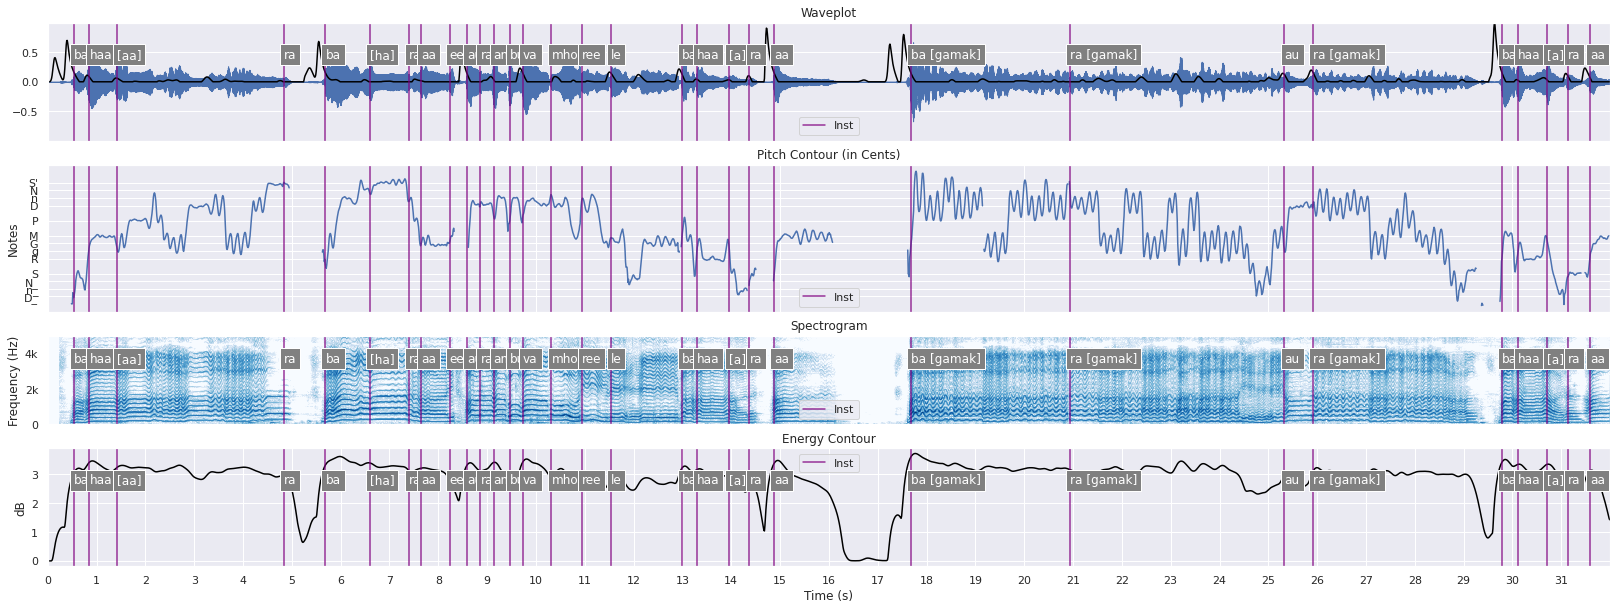

In [19]:
fig

In [20]:
df.loc[(df['Time'] > 5.3) & (df['Time'] < 5.8)]

,Time,ODF
531,5.31,0.168552
532,5.32,0.186941
533,5.33,0.204896
534,5.34,0.220255
535,5.35,0.230953
536,5.36,0.235620
537,5.37,0.233855
538,5.38,0.226167
539,5.39,0.213654
540,5.40,0.197623


In [24]:
fig.savefig('onset_1_SS-wEnergyFull-RagBah.png')

In [70]:
%%capture
# initialise figure, with 3 subplots
fig, axs = generateFig(3, (28, 10), [4, 4, 3])

In [71]:
# plot waveplot
axs[0], df = drawWave(audioPath=metadata['vocal_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], ax=axs[0], annotate=True, onsetPath=metadata['onset_file'], odf=True)
# plot with tala markings
axs[1], df = drawWave(audioPath=metadata['vocal_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], ax=axs[1], annotate=True, cyclePath=metadata['onset1'], numDiv=2, odf=True)
# axs[2] = spectrogram(audioPath=metadata['vocal_audio_path'], startTime=metadata['start_time'], duration=metadata['duration'], cmap='Blues', ax=axs[2], yticks=True, annotate=True, onsetPath=metadata['onset1'], xticks=True, freqXlabels=1)

In [62]:
fig.savefig('Data/OSF/pictures/NIRP1_MAK_TilakK_Vox_4-with tala.png')

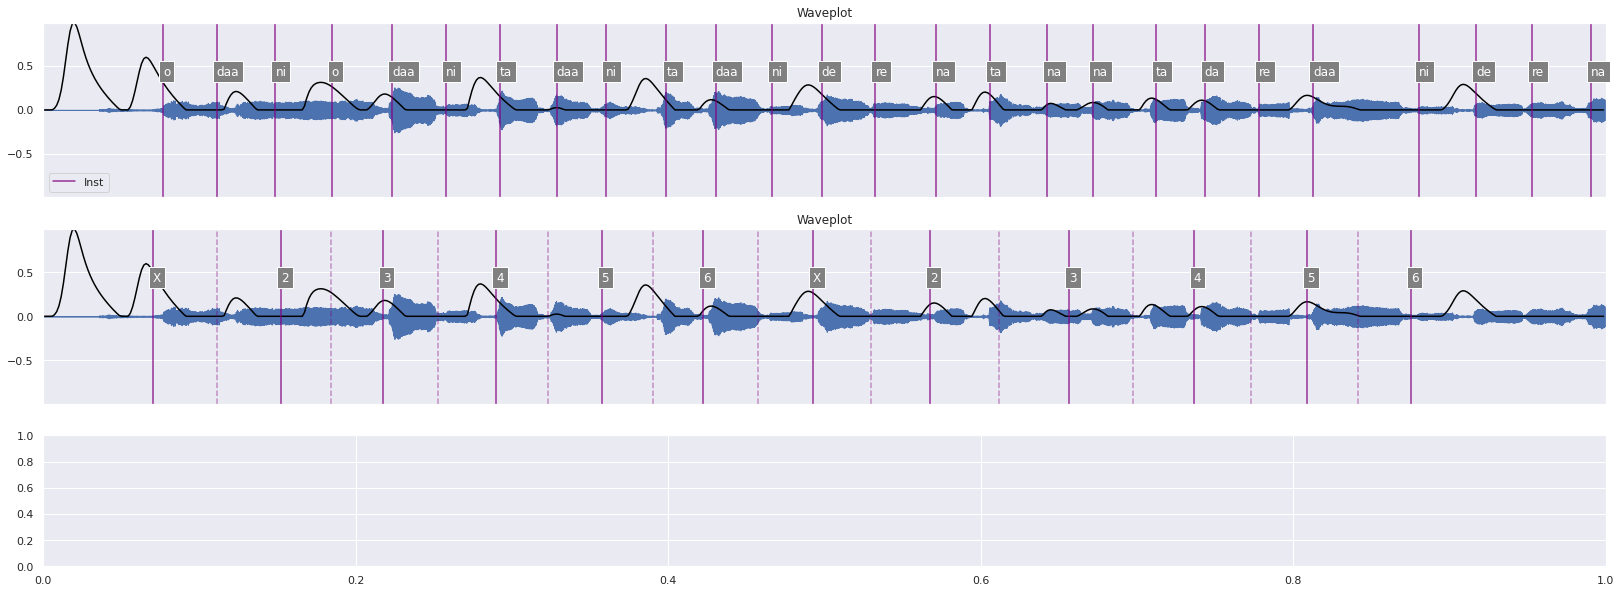

In [72]:
fig